## Correlating Dark Datter Density to the Shapes of Galaxies.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors 
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
import pickle
import treecorr
import time

In [2]:
# Load dictionaries from the pickled file
with open('C:\CAMELS DATA/sliced_dictionary_data_LH643.pkl', 'rb') as f:
    data = pickle.load(f)
    #sliced_s = data['sliced_s']
    sliced_g = data['sliced_g']
    sliced_ell = data['sliced_ell']
    sliced_dm = data['sliced_dm']
# angle array
sliced_phi = {}
for axis in ['x', 'y', 'z']:
    sliced_phi[axis] = {i: [] for i in range(15)}
for axis in ['x', 'y', 'z']:
    for slice_, ell_array in sliced_ell[axis].items():
        sliced_phi[axis][slice_] = np.angle(ell_array)/2

for axis in ['x', 'y', 'z']:
    print(f"Slices along {axis}-axis:")
    for slice_index in sliced_g[axis]:
        print(f"Slice {slice_index}:", sliced_g[axis][slice_index].shape)

Slices along x-axis:
Slice 0: (21, 3)
Slice 1: (25, 3)
Slice 2: (22, 3)
Slice 3: (28, 3)
Slice 4: (26, 3)
Slice 5: (29, 3)
Slice 6: (46, 3)
Slice 7: (43, 3)
Slice 8: (83, 3)
Slice 9: (186, 3)
Slice 10: (80, 3)
Slice 11: (95, 3)
Slice 12: (28, 3)
Slice 13: (84, 3)
Slice 14: (37, 3)
Slices along y-axis:
Slice 0: (19, 3)
Slice 1: (36, 3)
Slice 2: (19, 3)
Slice 3: (22, 3)
Slice 4: (55, 3)
Slice 5: (19, 3)
Slice 6: (22, 3)
Slice 7: (36, 3)
Slice 8: (143, 3)
Slice 9: (122, 3)
Slice 10: (111, 3)
Slice 11: (130, 3)
Slice 12: (22, 3)
Slice 13: (44, 3)
Slice 14: (33, 3)
Slices along z-axis:
Slice 0: (60, 3)
Slice 1: (21, 3)
Slice 2: (19, 3)
Slice 3: (11, 3)
Slice 4: (21, 3)
Slice 5: (35, 3)
Slice 6: (67, 3)
Slice 7: (32, 3)
Slice 8: (49, 3)
Slice 9: (54, 3)
Slice 10: (48, 3)
Slice 11: (43, 3)
Slice 12: (61, 3)
Slice 13: (222, 3)
Slice 14: (90, 3)


In [3]:
def dot_gen(N,xlim,ylim,zlim,x_y_or_z='z'):
    '''Generates N dots at uniformly random positions.
     Outputs: (Nx3) array 2st index x, y, z corrdinate,
                            1st index N dots
    Indicate which axis'''
    xyz = {'x':[xlim/15,ylim,zlim], 'y':[xlim,ylim/15,zlim], 'z':[xlim,ylim,zlim/15]}
    perp_ax = xyz[x_y_or_z]
    # randomly distribute x, y values (centre of stick)
    x = np.random.uniform(low=0.0, high=perp_ax[0], size=N)
    y = np.random.uniform(low=0.0, high=perp_ax[1], size=N)
    z = np.random.uniform(low=0.0, high=perp_ax[2], size=N)

    dots = np.transpose(np.array([x,y,z]))

    return dots
def elliptical_gen(N, xlim, ylim):
    '''Generates N galaxies at uniformly random positions with normally disributed ellipticities
      in a 2D box.
       Outputs: (2x2xN) array 1st index x, y corrdinate,
                              2nd index the upper and lower end of the stick
                              3rd index N sticks
    '''

    # randomly distribute x, y values (centre of stick)
    x = np.random.uniform(low=0.0, high=xlim, size=N)
    y = np.random.uniform(low=0.0, high=ylim, size=N)
    # normally distribute elipticities
    g1 = np.random.normal(0.0, 0.1, size=N)
    g2 = np.random.normal(0.0, 0.1, size=N)

    return np.array([x,y]).T, g1, g2

def stick_plot(ax, x, y, ellipticity, phi, bar_scaling=1, plot_index=None):
    '''Input the positions of galaxies, magnitude of the complex ellipticity '''
    ellipticity = ellipticity  * bar_scaling # making more elliptical galaxies loger bars
    del_y = ellipticity*np.sin(phi)
    del_x = ellipticity*np.cos(phi)
    # positions of ends of bar
    barx = np.array([x+del_x,x-del_x])
    bary = np.array([y+del_y,y-del_y])
    bars = np.array([barx,bary])
    
    for i in range(len(ellipticity)):
        ax.plot(bars[0,:,i],bars[1,:,i],color='#EF2E72') 

        ax.set_box_aspect(1)

def sliceplot(sliced_dm, sliced_s, sliced_g, sliced_ell, x_y_or_z = 0, _slice_ = 0,xlims=None,ylims=None):
    '''Plots stick plots of galaxies ontop of stars and dark matter histogram
    x_y_or_z: 1,2,3 <-> x,y,z
    _slice_ <-> 0 to 14'''
    xyz = [['x',1,2],['y',2,0],['z',0,1]]
    _ax_ = xyz[x_y_or_z][0] # which axis is perpendicular to the slice
    h = xyz[x_y_or_z][1] # horizontal axis
    v = xyz[x_y_or_z][2] # vertical axis
    print("Number of galaxies in this slice:", sliced_g[_ax_][_slice_].shape)
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel(f'{xyz[h][0]} /Mpc')
    ax.set_ylabel(f'{xyz[v][0]} /Mpc')
    ax.set_title(f'Ellipticities of Galaxies on Dark Matter from {_ax_} axis slice {_slice_}')
    #ax.scatter(sliced_dm[_ax_][_slice_][:,1] , sliced_dm[_ax_][_slice_][:,0], marker='o', s=0.0005, alpha=0.5,c='k')
    ax.hist2d(sliced_dm[_ax_][_slice_][:,h] , sliced_dm[_ax_][_slice_][:,v], cmap='bone', norm=colors.LogNorm(), bins=512)
    im= ax.scatter(sliced_s[_ax_][_slice_][:,h] , sliced_s[_ax_][_slice_][:,v], c='gold',
                    marker='o', s=1, alpha=1)
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    stick_plot(ax,sliced_g[_ax_][_slice_][:,h], sliced_g[_ax_][_slice_][:,v], np.absolute(sliced_ell[_ax_][_slice_]), 
               np.angle(sliced_ell[_ax_][_slice_])/2, bar_scaling=3)
    #ax.scatter(sliced_g[_ax_][_slice_][:,h], sliced_g[_ax_][_slice_][:,v], marker='x', s=50, alpha=1,c='r')
    ax.set_box_aspect(1)
    plt.show()

Number of galaxies in this slice: (21, 3)


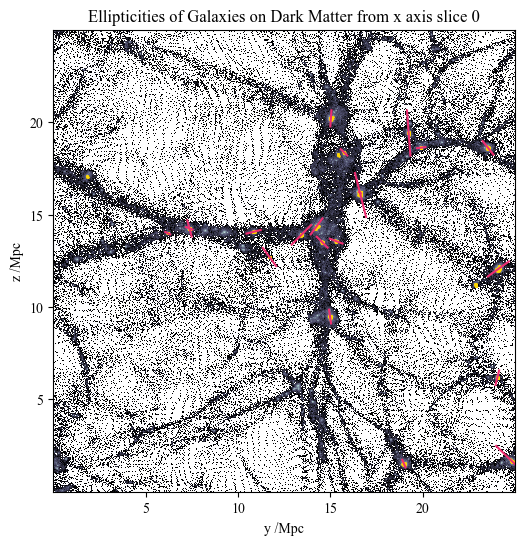

In [4]:
sliceplot(sliced_dm, sliced_s, sliced_g, sliced_ell, x_y_or_z = 0, _slice_ = 0,xlims=None,ylims=None)

### Cross correlation function

In [ ]:
xyz = [['x',1,2],['y',2,0],['z',0,1]]
nbins = 8
aggregate_corr = np.zeros((45,nbins))
aggregate_corr_imag = np.zeros((45,nbins))
i=0
for axis in range(3):
    _ax_ = xyz[axis][0] # which axis is perpendicular to the slice
    h = xyz[axis][1] # horizontal axis
    v = xyz[axis][2] # vertical axis
    for _slice_ in range(15):
        t1 = time.time()
        # Generating random sticks and dots for the correlation function
#         rand_xyz = dot_gen(N=len(sliced_dm[_ax_][_slice_][:,h]), xlim=25,ylim=25,zlim=25,x_y_or_z=_ax_)
#         stickscentre, randsticks_g1, randsticks_g2 = elliptical_gen(len(sliced_g[_ax_][_slice_][:,h]), xlim=25, ylim=25)
#         # rand initialise
#         rand1 = treecorr.Catalog(x=rand_xyz[:,h], y=rand_xyz[:,v])
#         rand2 = treecorr.Catalog(x=stickscentre[:,0], y=stickscentre[:,1], g1=randsticks_g1, g2= -randsticks_g2)
#         rg = treecorr.NGCorrelation(min_sep=0.1, max_sep=25,  nbins=nbins, var_method=None,metric='Periodic',xperiod=25,yperiod=25)
#         # data initialise
        cat1 = treecorr.Catalog(x=sliced_dm[_ax_][_slice_][:,h], y=sliced_dm[_ax_][_slice_][:,v])
        cat2 = treecorr.Catalog(x=sliced_g[_ax_][_slice_][:,h], y=sliced_g[_ax_][_slice_][:,v], 
                                g1=sliced_ell[_ax_][_slice_].real, g2=sliced_ell[_ax_][_slice_].imag)# two shear values (g1, g2) 
        ng = treecorr.NGCorrelation(min_sep=0.1, max_sep=25, nbins=nbins, var_method=None,metric='Periodic',xperiod=25,yperiod=25) 

        t2 = time.time()
        ng.process(cat1,cat2) 
#         rg.process(rand1,rand2)
        t3 = time.time()
        print(f'axis {_ax_} slice {_slice_} Time:',t3-t2,"+",t2-t1)
        NGcorr = ng.calculateXi(rg=None)# rg) # Finding correlation function

        aggregate_corr[i,:] = NGcorr[0]
        aggregate_corr_imag[i,:] = NGcorr[1]
        i+=1
r = ng.rnom
    
mean_corr = np.mean(aggregate_corr, axis=0)
mean_corr_imag = np.mean(aggregate_corr, axis=0)
sandard_err_corr = np.std(aggregate_corr, axis=0) /np.sqrt(45) # standard error = sd /sqrt(N)
sandard_err_corr_imag = np.std(aggregate_corr, axis=0) /np.sqrt(45)

axis x slice 0 Time: 0.38326025009155273 + 0.010002613067626953
axis x slice 1 Time: 0.48014259338378906 + 0.01026773452758789
axis x slice 2 Time: 0.5056507587432861 + 0.020119190216064453
axis x slice 3 Time: 0.6621415615081787 + 0.006514787673950195
axis x slice 4 Time: 0.6266801357269287 + 0.013554811477661133
axis x slice 5 Time: 0.5569729804992676 + 0.01835179328918457
axis x slice 6 Time: 0.600003719329834 + 0.012001276016235352
axis x slice 7 Time: 1.1792080402374268 + 0.013497591018676758
axis x slice 8 Time: 2.7614238262176514 + 0.17379188537597656
axis x slice 9 Time: 9.485623836517334 + 0.8445255756378174
axis x slice 10 Time: 1.5381064414978027 + 1.112222671508789
axis x slice 11 Time: 2.507080554962158 + 0.1258561611175537
axis x slice 12 Time: 0.8965208530426025 + 0.0559535026550293
axis x slice 13 Time: 2.5104470252990723 + 0.11528372764587402
axis x slice 14 Time: 1.630445957183838 + 2.840315580368042
axis y slice 0 Time: 1.2883310317993164 + 0.16549420356750488
axis y

In [ ]:
plt.figure(figsize=(7,5))
plt.grid(color = '0.5', linestyle = '--', linewidth = 0.5)
plt.errorbar(r,mean_corr,sandard_err_corr,color='limegreen',lw=1,label='standard error',capsize=5, elinewidth = 1, fmt = '.-')
plt.xlabel(r'r (scalar distance)')
plt.ylabel(r'Correlation $\xi$')
plt.title('Mean Position-Shear correlation')
plt.legend()
plt.show()

### Cross correlation with flipped ellipticity component $-\epsilon_2$

In [ ]:
xyz = [['x',1,2],['y',2,0],['z',0,1]]
nbins = 8
aggregate_corr2 = np.zeros((45,nbins))

i=0
for axis in range(3):
    t1 = time.time()
    _ax_ = xyz[axis][0] # which axis is perpendicular to the slice
    h = xyz[axis][1] # horizontal axis
    v = xyz[axis][2] # vertical axis
    for _slice_ in range(15):
        t1 = time.time()
#         # Generating random sticks and dots for the correlation function
#         rand_xyz = dot_gen(N=len(sliced_dm[_ax_][_slice_][:,h]), xlim=25,ylim=25,zlim=25,x_y_or_z=_ax_)
#         stickscentre, randsticks_g1, randsticks_g2 = elliptical_gen(len(sliced_g[_ax_][_slice_][:,h]), xlim=25, ylim=25)
#         # rand initialise
#         rand1 = treecorr.Catalog(x=rand_xyz[:,h], y=rand_xyz[:,v])
#         rand2 = treecorr.Catalog(x=stickscentre[:,0], y=stickscentre[:,1], g1=randsticks_g1, g2= -randsticks_g2)
#         rg = treecorr.NGCorrelation(min_sep=0.1, max_sep=25,  nbins=nbins, var_method=None,metric='Periodic',xperiod=25,yperiod=25)
#         # data initialise
        cat1 = treecorr.Catalog(x=sliced_dm[_ax_][_slice_][:,h], y=sliced_dm[_ax_][_slice_][:,v])
        cat2 = treecorr.Catalog(x=sliced_g[_ax_][_slice_][:,h], y=sliced_g[_ax_][_slice_][:,v], 
                                g1=sliced_ell[_ax_][_slice_].real, g2=-sliced_ell[_ax_][_slice_].imag)# two shear values (g1, g2) 
        ng = treecorr.NGCorrelation(min_sep=0.1, max_sep=25, nbins=nbins, var_method=None,metric='Periodic',xperiod=25,yperiod=25) 
        
        t2 = time.time()
        ng.process(cat1,cat2)  
#         rg.process(rand1,rand2)
        t3 = time.time()
        print(f'axis {_ax_} slice {_slice_} Time:',t3-t2,"+",t2-t1)
        NGcorr = ng.calculateXi(rg=None)# rg) # Finding correlation function

        aggregate_corr2[i,:] = NGcorr[0]
        i+=1
r2 = ng.rnom
    
mean_corr2 = np.mean(aggregate_corr2, axis=0)
sandard_err_corr2 = np.std(aggregate_corr2, axis=0) /np.sqrt(45) # standard error = sd /sqrt(N)

In [ ]:
plt.figure(figsize=(7,5))
plt.grid(color = '0.5', linestyle = '--', linewidth = 0.5)
plt.errorbar(r2,mean_corr2,sandard_err_corr2,color='blueviolet',lw=1,label='standard error',capsize=5, elinewidth = 1, fmt = '.-')
plt.xlabel(r'r (scalar distance)')
plt.ylabel(r'Correlation $\xi$')
plt.title('Flipped Ellipticity Mean Position-Shear correlation')
plt.legend()
plt.show()

### Spinning Galaxies by random amounts
Attempting to destroy any signal from the correation function by randomly disributing the shapes of galaxies, we can then determine differences in the correlation functions to observe Intrinsic Alignment.

In [ ]:
sliced_phi_rand = {'x': {}, 'y': {}, 'z': {}}
sliced_ell_rand = {'x': {}, 'y': {}, 'z': {}}
for axis in ['x', 'y', 'z']:
    for slice_index in sliced_phi[axis]:
        rangles = np.random.uniform(low=0,high=2*np.pi,size=len(sliced_phi[axis][slice_index]))
        sliced_phi_rand[axis][slice_index] = sliced_phi[axis][slice_index] + rangles
        
        sliced_ell_rand[axis][slice_index] = np.absolute(sliced_ell[axis][slice_index]) * np.exp(1j * rangles)


In [ ]:
sliceplot(sliced_dm, sliced_s, sliced_g, sliced_ell_rand, x_y_or_z = 0, _slice_ = 0,xlims=None,ylims=None)

In [ ]:
xyz = [['x',1,2],['y',2,0],['z',0,1]]
nbins = 8
aggregate_corr3 = np.zeros((45,nbins))

i=0
for axis in range(3):
    _ax_ = xyz[axis][0] # which axis is perpendicular to the slice
    h = xyz[axis][1] # horizontal axis
    v = xyz[axis][2] # vertical axis
    for _slice_ in range(15):
        t1 = time.time()
        # Generating random sticks and dots for the correlation function
        rand_xyz = dot_gen(N=len(sliced_dm[_ax_][_slice_][:,h]), xlim=25,ylim=25,zlim=25,x_y_or_z=_ax_)
        stickscentre, randsticks_g1, randsticks_g2 = elliptical_gen(len(sliced_g[_ax_][_slice_][:,h]), xlim=25, ylim=25)
        # rand initialise
        rand1 = treecorr.Catalog(x=rand_xyz[:,h], y=rand_xyz[:,v])
        rand2 = treecorr.Catalog(x=stickscentre[:,0], y=stickscentre[:,1], g1=randsticks_g1, g2= -randsticks_g2)
        rg = treecorr.NGCorrelation(min_sep=0.1, max_sep=25,  nbins=nbins, var_method=None,metric='Periodic',xperiod=25,yperiod=25)
        # data initialise
        cat1 = treecorr.Catalog(x=sliced_dm[_ax_][_slice_][:,h], y=sliced_dm[_ax_][_slice_][:,v])
        cat2 = treecorr.Catalog(x=sliced_g[_ax_][_slice_][:,h], y=sliced_g[_ax_][_slice_][:,v], 
                                g1=sliced_ell_rand[_ax_][_slice_].real, g2=sliced_ell_rand[_ax_][_slice_].imag)# two shear values (g1, g2) 
        ng = treecorr.NGCorrelation(min_sep=0.1, max_sep=25, nbins=nbins, var_method=None,metric='Periodic',xperiod=25,yperiod=25) 

        t2 = time.time()
        ng.process(cat1,cat2) 
        rg.process(rand1,rand2)
        t3 = time.time()
        print(f'axis {_ax_} slice {_slice_} Time:',t3-t2,"+",t2-t1)
        NGcorr = ng.calculateXi(rg=rg) # Finding correlation function

        aggregate_corr3[i,:] = NGcorr[0]
        i+=1
r3 = ng.rnom
    
mean_corr3 = np.mean(aggregate_corr3, axis=0)
sandard_err_corr3 = np.std(aggregate_corr3, axis=0) /np.sqrt(45) # standard error = sd /sqrt(N)

In [ ]:
plt.figure(figsize=(7,5))
plt.grid(color = '0.5', linestyle = '--', linewidth = 0.5)
plt.errorbar(r,mean_corr3,sandard_err_corr3,color='limegreen',lw=1,label='standard error',capsize=5, elinewidth = 1, fmt = '.-')
plt.errorbar(r,mean_corr,sandard_err_corr,color='xkcd:barney purple',lw=1,
             label='random standard error',capsize=5, elinewidth = 1, fmt = '.-')
plt.xlabel(r'r (scalar distance)')
plt.ylabel(r'Correlation $\xi$')
plt.title('Mean Position-Shear correlation $(\epsilon_1,\epsilon_2)$')
plt.legend()
plt.show()

In [ ]:
xyz = [['x',1,2],['y',2,0],['z',0,1]]
nbins = 8
aggregate_corr4 = np.zeros((45,nbins))

i=0
for axis in range(3):
    _ax_ = xyz[axis][0] # which axis is perpendicular to the slice
    h = xyz[axis][1] # horizontal axis
    v = xyz[axis][2] # vertical axis
    for _slice_ in range(15):
        t1 = time.time()
        # Generating random sticks and dots for the correlation function
        rand_xyz = dot_gen(N=len(sliced_dm[_ax_][_slice_][:,h]), xlim=25,ylim=25,zlim=25,x_y_or_z=_ax_)
        stickscentre, randsticks_g1, randsticks_g2 = elliptical_gen(len(sliced_g[_ax_][_slice_][:,h]), xlim=25, ylim=25)
        # rand initialise
        rand1 = treecorr.Catalog(x=rand_xyz[:,h], y=rand_xyz[:,v])
        rand2 = treecorr.Catalog(x=stickscentre[:,0], y=stickscentre[:,1], g1=randsticks_g1, g2= -randsticks_g2)
        rg = treecorr.NGCorrelation(min_sep=0.1, max_sep=25,  nbins=nbins, var_method=None,metric='Periodic',xperiod=25,yperiod=25)
        # data initialise
        cat1 = treecorr.Catalog(x=sliced_dm[_ax_][_slice_][:,h], y=sliced_dm[_ax_][_slice_][:,v])
        cat2 = treecorr.Catalog(x=sliced_g[_ax_][_slice_][:,h], y=sliced_g[_ax_][_slice_][:,v], 
                                g1=sliced_ell_rand[_ax_][_slice_].real, g2=-sliced_ell_rand[_ax_][_slice_].imag)# two shear values (g1, g2) 
        ng = treecorr.NGCorrelation(min_sep=0.1, max_sep=25, nbins=nbins, var_method=None,metric='Periodic',xperiod=25,yperiod=25) 

        t2 = time.time()
        ng.process(cat1,cat2)
        rg.process(rand1,rand2)
        t3 = time.time()
        print(f'axis {_ax_} slice {_slice_} Time:',t3-t2,"+",t2-t1)
        NGcorr = ng.calculateXi(rg=rg) # Finding correlation function

        aggregate_corr4[i,:] = NGcorr[0]
        i+=1
r4 = ng.rnom
    
mean_corr4 = np.mean(aggregate_corr4, axis=0)
sandard_err_corr4 = np.std(aggregate_corr4, axis=0) /np.sqrt(45) # standard error = sd /sqrt(N)

In [ ]:
fig, ax = plt.subplots(1, 2,figsize=(14, 5))
ax[0].grid(color = '0.5', linestyle = '--', linewidth = 0.5)
ax[0].errorbar(r3,mean_corr3,sandard_err_corr3,color='limegreen',lw=1,label='standard error',capsize=5, elinewidth = 1, fmt = '.-')
ax[0].errorbar(r,mean_corr,sandard_err_corr,color='xkcd:barney purple',lw=1,
             label='random standard error',capsize=5, elinewidth = 1, fmt = '.-')
ax[0].set_xlabel(r'r (scalar distance)')
ax[0].set_ylabel(r'Correlation $\xi$')
ax[0].set_title('Mean Position-Shear correlation $(\epsilon_1,\epsilon_2)$')
ax[0].legend()
ax[1].grid(color = '0.5', linestyle = '--', linewidth = 0.5)
ax[1].errorbar(r4,mean_corr4,sandard_err_corr4,color='xkcd:jade green',lw=1,label='standard error',capsize=5, elinewidth = 1, fmt = '.-')
ax[1].errorbar(r2,mean_corr2,sandard_err_corr2,color='blueviolet',lw=1,
             label='random standard error',capsize=5, elinewidth = 1, fmt = '.-')
ax[1].set_xlabel(r'r (scalar distance)')
ax[1].set_ylabel(r'Correlation $\xi$')
ax[1].set_title('Mean Position-Shear correlation $(\epsilon_1,-\epsilon_2)$')
ax[1].legend()
plt.show()

axis y slice 1 Time: 6.277989387512207 + 5.797072172164917
axis y slice 2 Time: 4.629995346069336 + 9.228363275527954
axis y slice 3 Time: 15.039351224899292 + 12.922446012496948
axis y slice 4 Time: 5.0503363609313965 + 4.925346374511719
axis y slice 5 Time: 3.6870217323303223 + 6.492548227310181
axis y slice 6 Time: 5.707650661468506 + 3.684297800064087
axis y slice 7 Time: 3.953429698944092 + 12.14028024673462
axis y slice 8 Time: 50.474849224090576 + 28.809612274169922
axis y slice 9 Time: 37.51596999168396 + 35.75523495674133
axis y slice 10 Time: 36.288872718811035 + 31.547166347503662
axis y slice 11 Time: 57.6568341255188 + 41.26106095314026
axis y slice 12 Time: 3.0377964973449707 + 6.185831069946289
axis y slice 13 Time: 19.743054389953613 + 7.2115466594696045
axis y slice 14 Time: 18.641573667526245 + 9.569459676742554
axis z slice 0 Time: 24.784743785858154 + 13.376282691955566
axis z slice 1 Time: 11.502662420272827 + 7.261573553085327
axis z slice 2 Time: 3.2292320728302 